In [32]:
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import requests as r
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
cores = {0: 'red',1: 'blue', 2: 'yellow',  3: 'green', 4: 'purple', 5: 'gray', 6: 'pink', 7: 'orange', 8: 'black', 9: 'cyan',10:'brown',11:'olive',12:'lightgray',13:'salmon',14:'darkgreen',15:'crimson',16:'darkkhaki',17:'lime',18:'bisque',19:'gold'}
G = nx.Graph()
for i in range(167):
    G.add_node(i)

In [34]:
def NCut( W , Labels ):
    n=len(W)
    k=0
    lst=[]                                            #ENCONTRA O VALOR DE K
    for j in range(0,n):
        for i in range(0,n):
            if Labels[i]==j and j not in lst:
                lst.append(j)
                k=k+1                                 #VALOR DE K ENCONTRADO
    Grau = W @ np.ones(n)                             #DESCOBRIR O VOLUME DE CADA PARTIÇÃO
    Volume = np.zeros(k)
    for q in range(0,n):
        for w in range(0,n):
            if Labels[w] == q:
                Volume[q] = Volume[q] + Grau[w]       #Matriz com o volume encontrada
    Cut = np.zeros(k)                                 #DESCOBRIR O CUT DE CADA PARTIÇÃO
    for t in range(0,k):
        for y in range(0,n):
            if Labels[y] == t:
                for u in range(0,n):
                    if Labels[u] != t:
                        Cut[t] = Cut [t] + W[y,u]     #VALOR DE CUT ENCONTRADO PARA CADA PARTIÇÃO
    Precut = Cut / Volume                             #DIVISÃO DO CUT PELO VOLUME DE CADA PARTIÇÃO 
    NCut = sum(Precut)
    return NCut
def Find_Array(A , k): #Find vectors that k-means will be applied
    n = len(A)
    D = np.diag( (A @ np.ones(n)) ** (-1/2))      
    Render = D @ A @ D                          
    Normalized_Laplacian = np.eye(n) - Render 
    A, V = np.linalg.eigh(Normalized_Laplacian)
    X=V[:,:k]
    Y = np.zeros(X.shape)
    for i in range(n):
        for j in range(k):
            Y[i,j] = X[i,j]/np.linalg.norm(X[i,:])
    return Y
def centros(LABEL,centro):
    CENTROS = []
    c = np.zeros((centro))
    k=0
    while k < centro:
        for i in range(0,n):
            if LABEL[i] == k:
                if c[k] < pop[i]:
                    c[k]=pop[i]
        CENTROS.append(np.where(pop==c[k])[0][0])
        k+=1
    return CENTROS

In [39]:
# Importing Data
data = r.get("http://servicodados.ibge.gov.br/api/v2/malhas/43?formato=application/vnd.geo+json")
mapa_rs_json = data.json()['features'][0]
coords = mapa_rs_json['geometry']['coordinates'];
x = [i for i,j in coords[0]]
y = [j for i,j in coords[0]]
casos_pd = pd.read_excel('Casos.xlsx') 
casos = casos_pd.values
pos_pd = pd.read_excel('posições.xlsx') 
pos = pos_pd.values
pos = np.delete(pos,0,1)
mps_pd = pd.read_excel('municipios.xlsx') 
mps = mps_pd.values
mps = np.delete(mps,0,1)
pop=mps[:,2]
n = len(mps)
dist_pd = pd.read_excel('distancia.xlsx') 
dist = dist_pd.values
dist = np.delete(dist,0,1)
dist = dist/1000
pd0 = pd.read_excel('Migração Pendular.xlsx',sheet_name = 0)
d0 = pd0.values
d0 = np.delete(d0,0,1)
D0 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        D0[i,j] = d0[i,j]
D0+=np.transpose(D0)
pd1 = pd.read_excel('Migração Pendular.xlsx',sheet_name = 1)
d1 = pd1.values
d1 = np.delete(d1,0,1)
pd2 = pd.read_excel('Migração Pendular.xlsx',sheet_name = 2)
d2 = pd2.values
d2 = np.delete(d2,0,1)
D2 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        D2[i,j] = d2[i,j]
D2+=np.transpose(D2)
pd3 = pd.read_excel('Migração Pendular.xlsx',sheet_name = 3)
d3 = pd3.values
d3 = np.delete(d3,0,1)
PD1 = pd.read_excel('Isolamento Social.xlsx')
pd1 = PD1.values
pd1 = np.delete(pd1,0,1)
PD = pd.read_excel('Divisões do Estado.xlsx')
DIV = PD.values
Div = DIV[0:167]
Div=np.delete(Div,-1,1)
Div=np.delete(Div,-1,1)
Regioes = []
for i in range(n):
    Regioes.append(int(Div[i,1]))
import unidecode

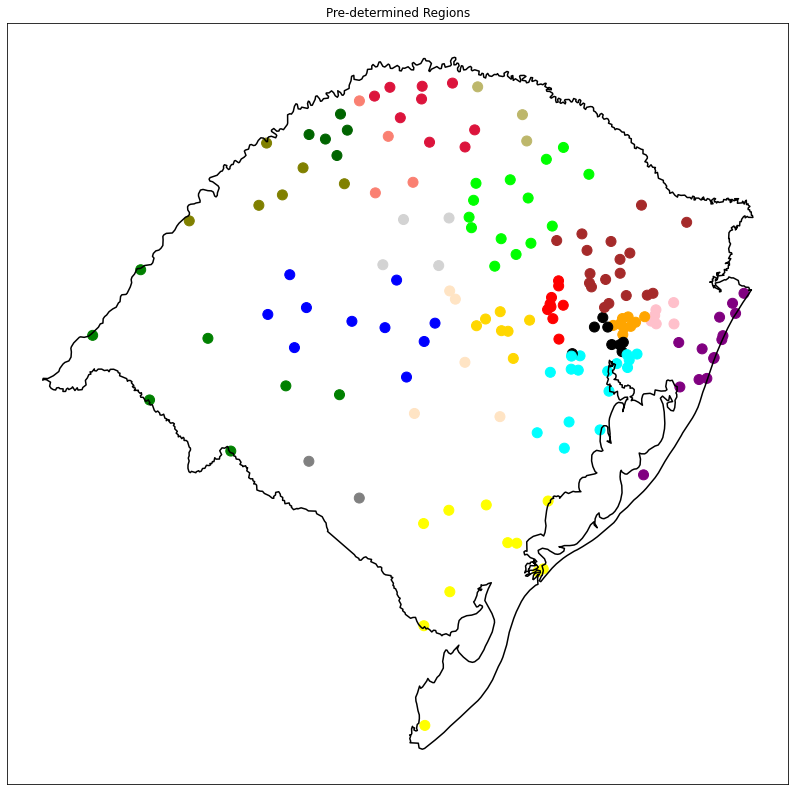

In [9]:
colors=[]
for h in range(n):
    colors.append(cores[Regioes[h]])
f , ax = plt.subplots(1, 1,figsize=(14,14)) 
ax.set_title('Pre-determined Regions')
nx.draw_networkx(G,pos=pos,with_labels=False,ax = ax,node_size=100,node_color=colors)#,labels=aux)
ax.plot(x,y,c='black')

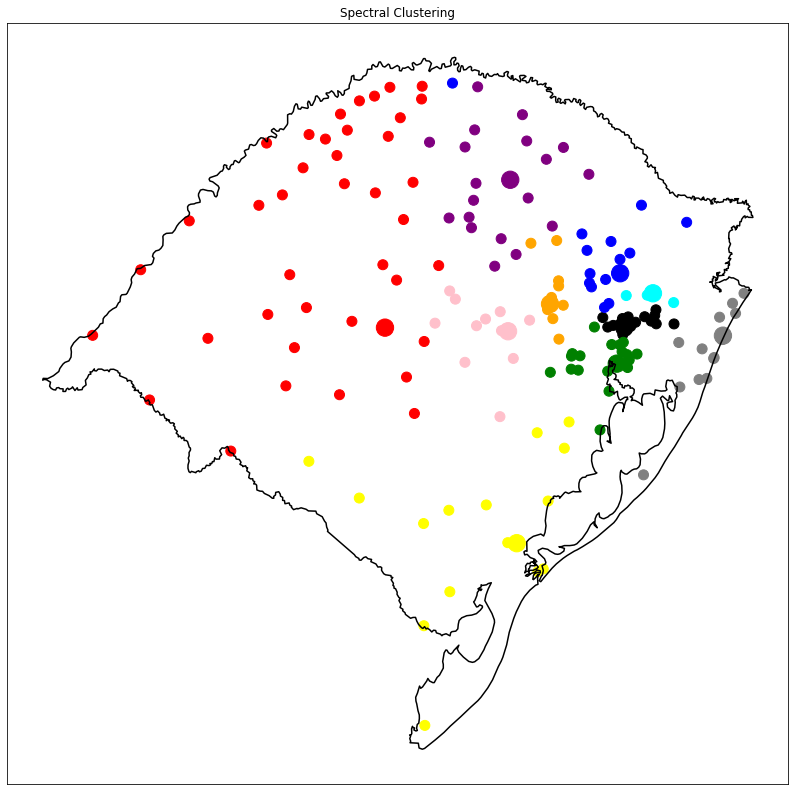

In [20]:
A = D0+D2                     #pendular migration matrix
ncut=[]
label=[]
for k in range(500):
    Y = Find_Array(A,10)
    KM = KMeans(n_clusters=10).fit(Y)
    ncut.append(NCut(A,KM.labels_))
    label.append(KM.labels_)
    
CENTERS = centros(KM.labels_,10)
node_size = []
for i in range(n):
    if i in CENTERS:
        node_size.append(300)
    else:
        node_size.append(100)
colors=[]
for i in range(n):
    colors.append(cores[KM.labels_[i]])
f , ax = plt.subplots(1, 1,figsize=(14,14))
ax.set_title('Spectral Clustering')
nx.draw_networkx(G,pos=pos,with_labels=False,node_size=node_size,node_color=colors)
plt.plot(x,y,c='black')

In [43]:
Leitos = [] 
for i in range(8):
    Pd = pd.read_excel('Leitos/Leitos {}.xlsx'.format(7*i + 4))
    pdv = Pd.values
    pdv = np.delete(pdv,0,1)
    Leitos.append(pdv)
for i in range(n):
    accented_string = u'{}'.format(mps[i][0])
    # accented_string is of type 'unicode'
    unaccented_string = unidecode.unidecode(accented_string)
    mps[i,0] = unaccented_string 
for i in range(n):
    mps[i,0] = mps[i,0].lower()
for i in range(8):
    for j in range(len(Leitos[i])):
        if Leitos[i][j][3] > Leitos[i][j][2]:
            Leitos[i][j][3] = Leitos[i][j][2]
Leitos_totais = []
Leitos_ocupados = []
Leitos_covid = []

for k in range(8):
    Ma1 = np.zeros((n))
    Ma2 = np.zeros((n))
    Ma3 = np.zeros((n))
    for i in range(n):
        if mps[i,0] in Leitos[k][:,1]:
            Ma1[i] = Leitos[k][np.where(Leitos[k][:,1] == mps[i,0])[0][0],2]
            Ma2[i] = Leitos[k][np.where(Leitos[k][:,1] == mps[i,0])[0][0],3]
            Ma3[i] = Leitos[k][np.where(Leitos[k][:,1] == mps[i,0])[0][0],4]
    Leitos_totais.append(Ma1)
    Leitos_ocupados.append(Ma2)
    Leitos_covid.append(Ma3)
W = np.zeros((n,n))
W1 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i!=j:
            W1[i,j] = (Leitos_totais[0][j] - Leitos_totais[0][i])/(10+dist[i,j])
for i in range(n):
    for j in range(n):
        W[i,j] = max(W1[i,j],W1[j,i])
U1 = []
U=[]
for k in range(8):
    aux = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i!=j:
               # if Leitos_totais[k][i] == 0 :
               #     aux[i,j] = (Leitos_totais[k][j] - Leitos_ocupados[k][j]) / (10+dist[i,j])
               # else:
                aux[i,j] = ((1+Leitos_ocupados[k][i])/(1+Leitos_totais[k][i]))*((Leitos_totais[k][j]-Leitos_ocupados[k][j]) - (Leitos_totais[k][i]-Leitos_ocupados[k][i]))/(10+dist[i,j])
    U1.append(aux)
for k in range(8):
    U2 = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            U2[i,j] = max(U1[k][i,j],U1[k][j,i])
    U.append(U2)

In [45]:
LABEL = []
for j in range(8):
    ncut=[]
    label = []
    for i in range(500):
        Y = Find_Array(U[j],20)
        KM = KMeans(n_clusters=20).fit(Y) 
        label.append(KM.labels_)
        ncut.append(NCut(U[j], KM.labels_))
    LABEL.append(label[np.argmin(ncut)])

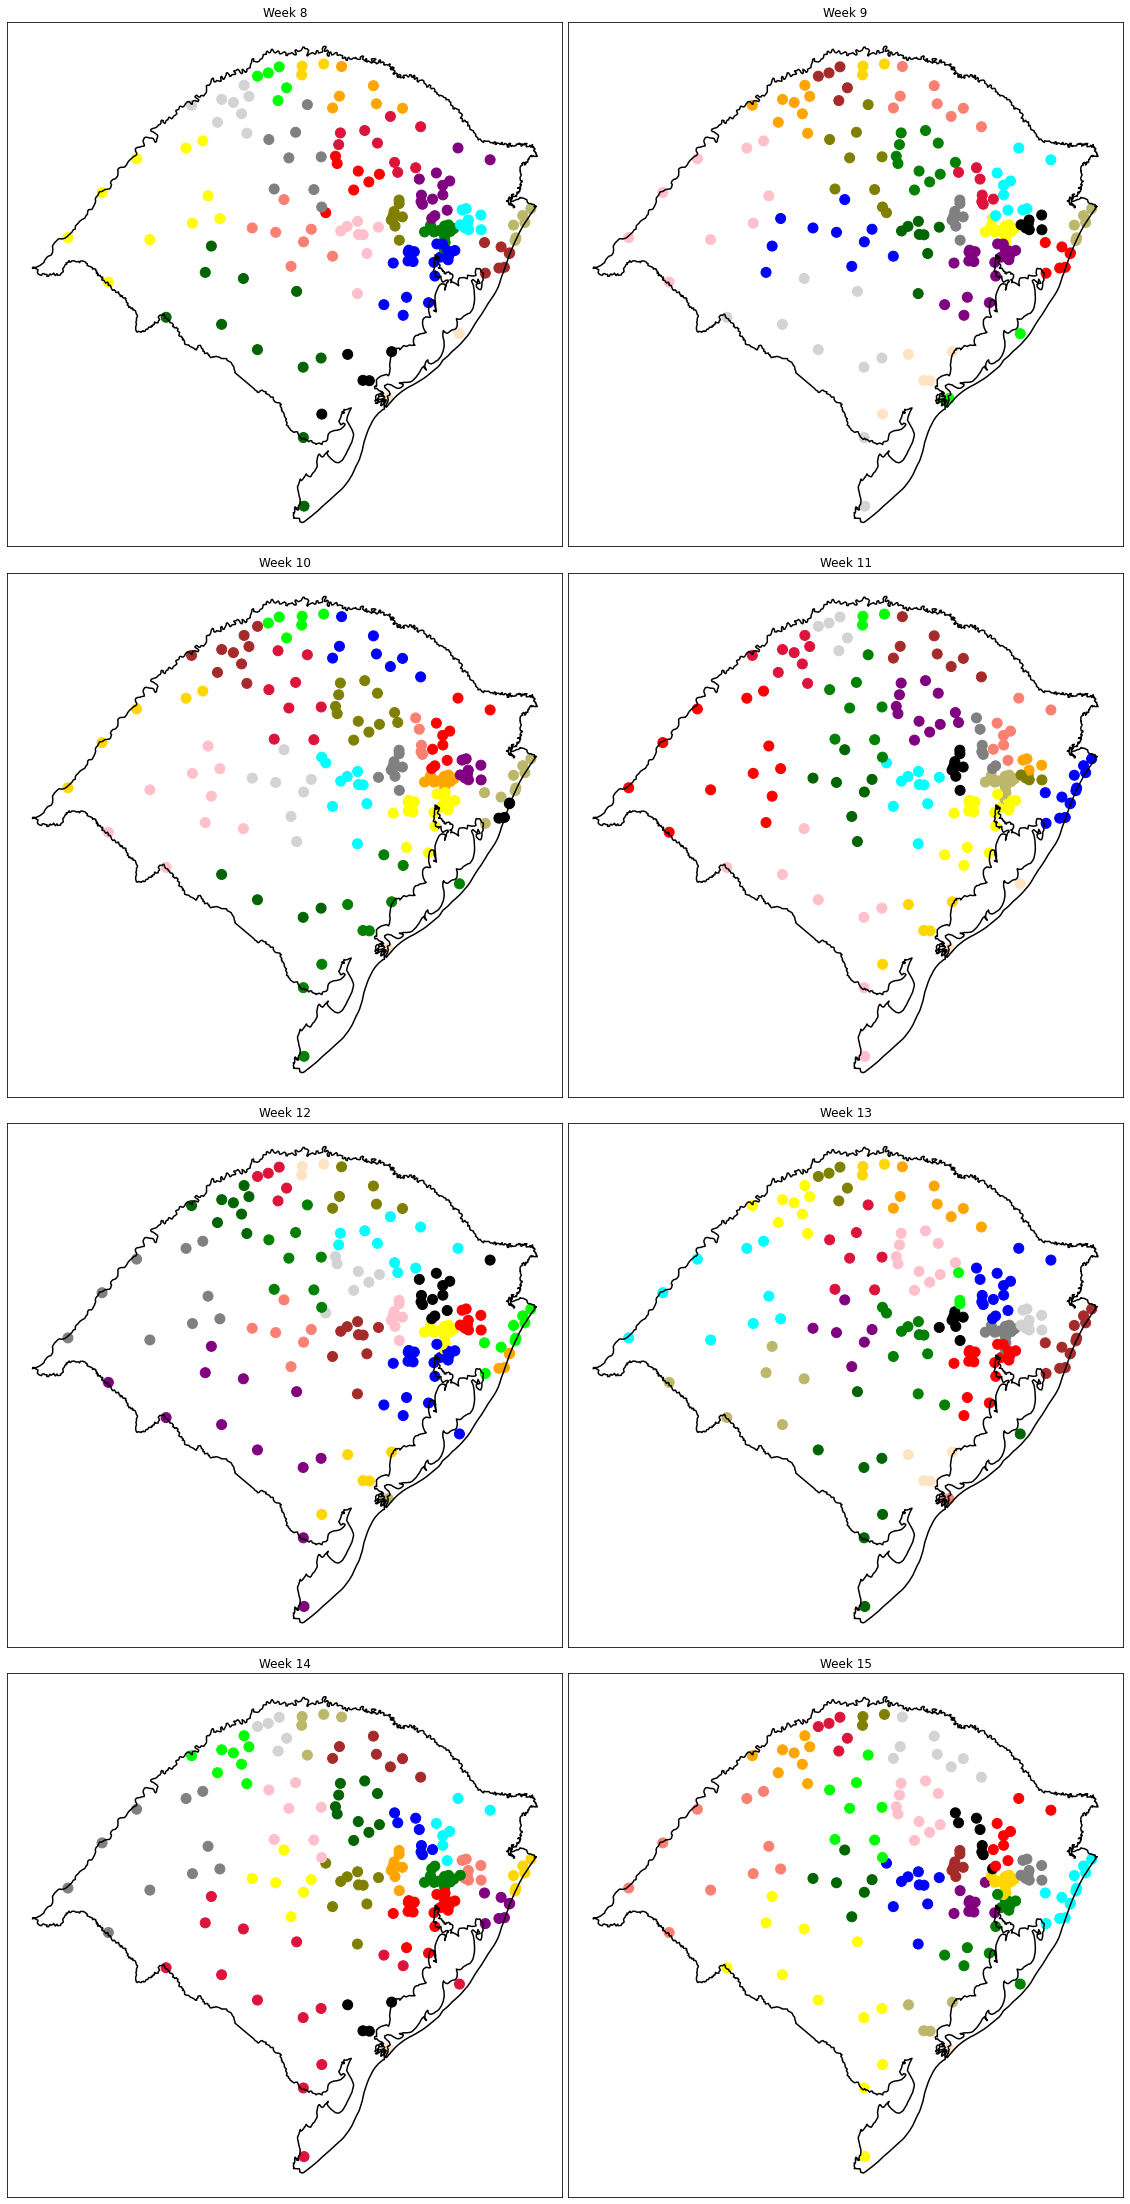

In [50]:
f , ax = plt.subplots(4, 2,figsize=(20,40)) 
for i in range(4):
    colors1=[]
    for h in range(n):
        colors1.append(cores[LABEL[2*i][h]])
    colors2=[]
    for h in range(n):
        colors2.append(cores[LABEL[2*i+1][h]])   
    ax[i][0].set_title('Week {}'.format(2*i+8))
    nx.draw_networkx(G,pos=pos,with_labels=False,ax = ax[i][0],node_size=100,node_color=colors1)
    ax[i][0].plot(x,y,c='black')
    ax[i][1].set_title('Week {}'.format(2*i+9))
    nx.draw_networkx(G,pos=pos,with_labels=False,ax = ax[i][1],node_size=100,node_color=colors2)
    ax[i][1].plot(x,y,c='black')
plt.subplots_adjust(wspace=0.01, hspace=0.05)

In [24]:
casos_ativos = np.zeros((n,130))
casos_ativos[:,0] = casos[:,0]
for i in range(n):
    for j in range(1,130):
        if j < 14:
            casos_ativos[i,j] = casos[i,j]
        else:
            casos_ativos[i,j] = casos[i,j] - casos[i,j-14]
diag = []
for i in range(n):
    diag.append(d1[i,2]+d3[i,1])
D = D0 + D2 + np.eye(n) * diag
desloc = np.zeros((n,n))
for i in range(n):
    desloc[i] = D[i]/sum(D[i])
piramide = np.zeros((13))

piramide[0] = 0.00
piramide[1] = 0.00
piramide[2] = 0.00
piramide[3] = 0.08
piramide[4] = 0.24
piramide[5] = 0.36
piramide[6] = 0.24
piramide[7] = 0.08
P = pop
Isolamento = np.zeros((n,131))
for i in range(n):
    for j in range(131):
        Isolamento[i,j] = pd1[(131*i)+j,1]
Tabela_I = np.zeros((n,75))
Tabela_S = np.zeros((n,75))
Tabela_Inew = np.zeros((n,75))
Tabela_T = np.zeros((n,75))

In [25]:
for x in range(0,1):
    #### fazer de 45 pra 46 no caso de mantido o iso.
    DIA_INICIAL=70
    intervalo_coleta = 7
    tempo = 131-DIA_INICIAL
    Lv = np.ones((n,tempo))*20          #############NÚMERO DE ENCONTROS
    tau = np.zeros((n,tempo))
    for i in range(n):
        for j in range(13):
            tau[i,j] = (2.4/20)*piramide[j]
    I = np.zeros((n,tempo))
    S = np.zeros(I.shape)
    It = np.zeros(I.shape)
    for i in range(intervalo_coleta):
        I[:,i] = casos_ativos[:,(DIA_INICIAL + i)]# casos_ativos[:,(DIA_INICIAL + i)] ##
        S[:,i] = P - I[:,i]

    I_new = I.copy()
    R_dia = np.zeros([I.shape[0],1])
    R = np.zeros(I.shape)

    # Reducao_s[i,j] =  ((Isolamento[i,j] - min(Isolamento[i]))/(1 - min(Isolamento[i])))    
    minC = Isolamento.min(axis = 1)
    Reducao_s = np.zeros((n,tempo))
    for i in range(intervalo_coleta):
        I_new[:,i] = (0.1*casos_ativos[:,DIA_INICIAL + i] )
        
    for i in range(n):
        for j in range(tempo):
            if j < 131 - DIA_INICIAL:
                Reducao_s[i,j] =  ((Isolamento[i,j+DIA_INICIAL] - min(Isolamento[i,0:30]))/(1 - min(Isolamento[i,0:30])))
            if j >= 131 - DIA_INICIAL:
                Reducao_s[i,j] =  ((Isolamento[i,130] - min(Isolamento[i,0:30]))/(1 - min(Isolamento[i,0:30])))


    for t in range(intervalo_coleta-1, tempo-1):

        r = x/75 #r
        S[:,t+1] = S[:,t] * ( desloc @ (( 1 - np.sum(( (desloc@I_new[ : , 0:t ]) * np.flip(tau[:,0:t],axis=1 )),axis = 1) / (desloc @ P))**( Lv[:,t] * (1 - Reducao_s[:,t] )**(2)   )  )) 
                                                                                                                    #Reducao_s[:,t]
        I_new[:,t+1] = S[:,t] * ( desloc @ (1-( (1 - np.sum(( (desloc@I_new[ : , 0:t ]) * np.flip(tau[:,0:t],axis=1 )),axis = 1) / (desloc @ P))**( Lv[:,t] * (1 - Reducao_s[:,t])**(2) )  )))

        if t > 12:
            R_dia = I_new[:,t - 13]       

        I[:,t+1] = I[:,t]  + I_new[:,t+1] - np.transpose(R_dia)    
        R[:,t+1] = R[:,t] +  np.transpose(R_dia) 

        It[:,t+1] = It[:,t] + I_new[:,t+1]   
        
        Tabela_I[:,x] = I[:,-1]
        Tabela_S[:,x] = S[:,-1]
        Tabela_Inew[:,x] = I_new[:,-1]
        Tabela_T[:,x] = It[:,-1]

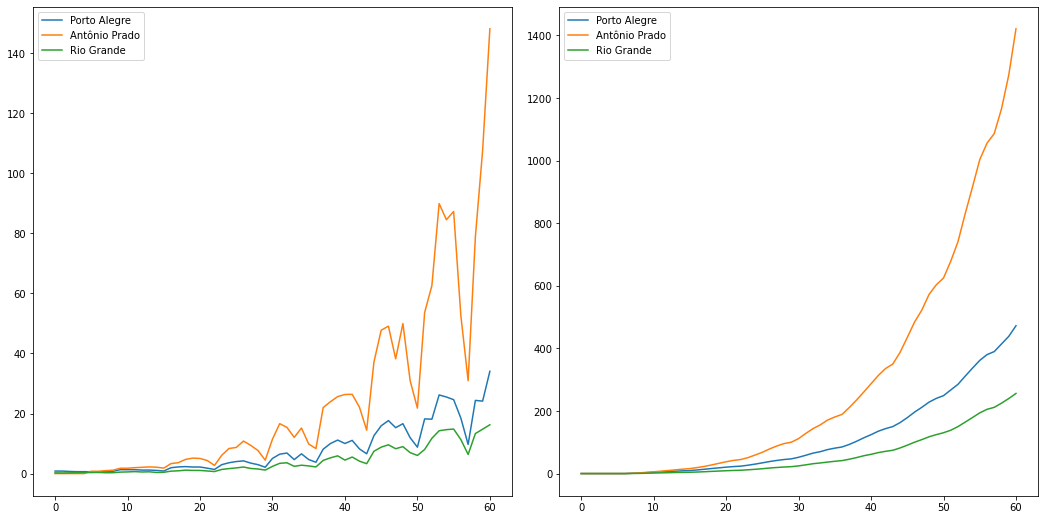

In [27]:
mark=['o','s','v']
Prop_new = np.zeros((n,tempo))
Prop_tot = np.zeros((n,tempo)) 
for i in range(n):
    for j in range(tempo):
        Prop_new[i,j] = I_new[i,j]*(100_000/mps[i,2])
        Prop_tot[i,j] = It[i,j]*(100_000/mps[i,2])
quero_ver = [0,138,9]
fig, ax = plt.subplots(1, 2, figsize=(18,9))
for w in range(len(quero_ver)):
    ax[0].plot(Prop_new[quero_ver[w]])
    ax[1].plot(Prop_tot[quero_ver[w]])
ax[0].legend([mps[quero_ver[0]][0],mps[quero_ver[1]][0],mps[quero_ver[2]][0]])
ax[1].legend([mps[quero_ver[0]][0],mps[quero_ver[1]][0],mps[quero_ver[2]][0]])
plt.subplots_adjust(wspace=0.1, hspace=0.01)